# **TEXT SIMILARITY**

**1. Jaccard**

The Jaccard index (Jaccard Coefficient, Jaccard Dissimilarity, and Jaccard Distance) is a statistic used for gauging the similarity and diversity of sample sets. It is defined in general taking the ratio of two sizes, the intersection size divided by the union size, also called intersection over union.

*Similarity 0.143* is close to 0, it indicates that the two sets are quite dissimilar.

*Similarity 0.6* is close to 1, it indicates that the two sets are quite similar.


Jaccard Similarity = (number of observations in both sets) / (number in either set)

In [ ]:
def jaccard_similarity(x,y):
  intersection_cardinality = len(set.intersection(*[set(x), set(y)])) # number of observations in both, intersection
  union_cardinality = len(set.union(*[set(x), set(y)]))# number of observations in either, union
  similarity=intersection_cardinality/float(union_cardinality)
  distance=1-similarity
  return similarity,distance

In [ ]:
# similar
sentences = ["Digitalisierung wächst trotz Rekordeinnahmen.",
"Digitalisierung wächst bei Rekordeinnahmen."]
sentences = [sent.lower().split(" ") for sent in sentences]
J_Similarity,J_Distance = jaccard_similarity(sentences[0], sentences[1])
print("Jaccard Similarity: ",J_Similarity)
print("Jaccard Distance: ",J_Distance)

Jaccard Similarity:  0.6
Jaccard Distance:  0.4


In [ ]:
# dissimilar
sentences = ["Digitalisierung wächst trotz Rekordeinnahmen.",
"Digitalisierung hat unvorstellbare Folgen."]
sentences = [sent.lower().split(" ") for sent in sentences]
J_Similarity,J_Distance = jaccard_similarity(sentences[0], sentences[1])
print("Jaccard Similarity: ",J_Similarity)
print("Jaccard Distance: ",J_Distance)

Jaccard Similarity:  0.14285714285714285
Jaccard Distance:  0.8571428571428572


**2. Euclidean Distance**

Euclidian distance or Euclidean Metric represents the length of a line segment between two points, which can be calculated by the Pythagorean Theorem.

According to the Euclidian distance, the shorter the distance between the two texts is, the more similar they are. Thus, text 2 is more similar to text 3. Long sentences tend to have higher Euclideum score than the short ones.



In [ ]:
pip install spacy

In [ ]:
import spacy
import pandas as pd
import numpy as np

In [ ]:
text_1 = "Sie investieren in Medien und Digitalisierung"
text_2 = "Digitalisierung hat unvorstellbare Folgen"
text_3 = "Digitalisierung: Förderprogramme für Unternehmen 2025"

## Create a list of the sentences
texts = [text_1, text_2, text_3]

from sklearn.feature_extraction.text import CountVectorizer

## Firstly let's count the words using the CountVectorizer
count_vectorizer = CountVectorizer(stop_words=["ein","das","der","die","den"]) # full list of german stop words is online available
count_vectorizer = CountVectorizer()
matrix = count_vectorizer.fit_transform(texts)

## we can create a dataframe to represent the number of the words in every sentence
table = matrix.todense()
df = pd.DataFrame(table,
                  columns=count_vectorizer.get_feature_names_out(),
                  index=['text_1', 'text_2', 'text_2'])
df

,2025,digitalisierung,folgen,förderprogramme,für,hat,in,investieren,medien,sie,und,unternehmen,unvorstellbare
text_1,0,1,0,0,0,0,1,1,1,1,1,0,0
text_2,0,1,1,0,0,1,0,0,0,0,0,0,1
text_2,1,1,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
# Compute the Euclidean distance of these sentences.
# Shorter the distance between the two texts is, the more similar they are. Thus, text 2 is more similar to text 3.

from scipy.spatial import distance

matrix = distance.cdist(df, df, 'euclidean')

df_eucl = pd.DataFrame(matrix,
                  columns= ["Text_1", "Text_2", "Text_3"],
                  index=['text_1', 'text_2', 'text_3'])
df_eucl

,Text_1,Text_2,Text_3
text_1,0.000000,2.828427,3.000000
text_2,2.828427,0.000000,2.645751
text_3,3.000000,2.645751,0.000000


**3. Count vectoriser and cosine similarity**

Using sklearn cosine_similarity and CountVectoriser. CountVectorizer is generally used for featurization of text data whereas OneHotEncoder is only used for featurization of categorical variables. One-hot vectors are high-dimensional and sparse, while word embeddings are low-dimensional and dense.

In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.

To overcome this , we use TfidfVectorizer .

In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.


In [ ]:
headlines = [
#Finanzen
'Staatsverschuldung wächst trotz Rekordeinnahmen',
'Staatsverschuldung ist mehr als nur eine Sonderzahlung',

#Digitalisierung
'Digitalisierung: Förderprogramme für Unternehmen 2025',
'Sie investieren in Medien und Digitalisierung',
'Digitalisierung wird unvorstellbare Folgen haben',

#Kultur
'Kunst oder Kommunikation: Wie trennbar ist das Werk vom Künstler?']

In [ ]:
labels = [headline[:20] for headline in headlines]

def create_heatmap(similarity, cmap = "Greys"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap,annot=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

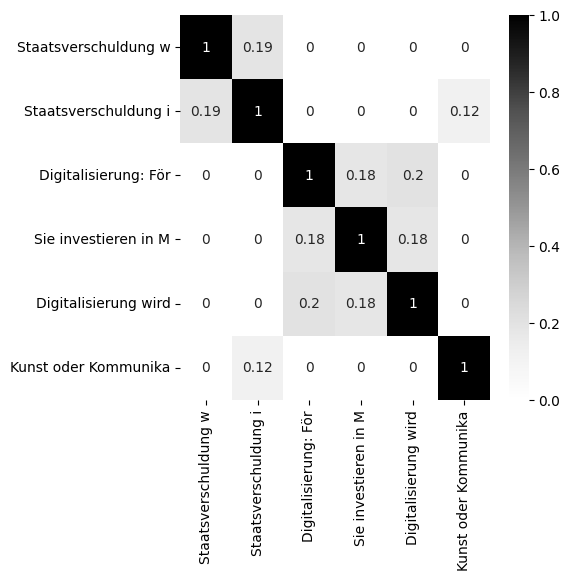

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(headlines)
arr = X.toarray()

create_heatmap(cosine_similarity(arr))

**4. Term Frequency-Inverse Document Frequency (TF-IDF)**

statistical measure used in information retrieval and machine learning to evaluate the importance of a word in a document relative to a collection of documents.

TF IDF - close to 0 = not informative

TF IDF - close to 1 = very similar, informative

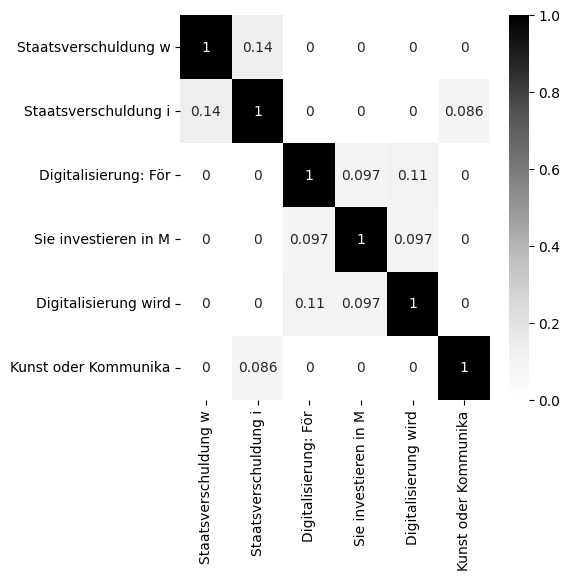

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(headlines)
arr = X.toarray()

create_heatmap(cosine_similarity(arr))

**5. Word2Vec**

Word2vec is a open source tool to calculate the words distance provided by Google. It can be used by inputting a word and output the ranked word lists according to the similarity

In [ ]:
!python -m spacy download de_core_news_sm
!python -m spacy download de_core_news_md
!python -m spacy download de_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 41.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 11.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 MB 3.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load(

In [ ]:
nlp = spacy.load("de_core_news_sm")
docs = [nlp(headline) for headline in headlines]

<ipython-input-15-1548687793>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  row.append(docs[i].similarity(docs[j]))


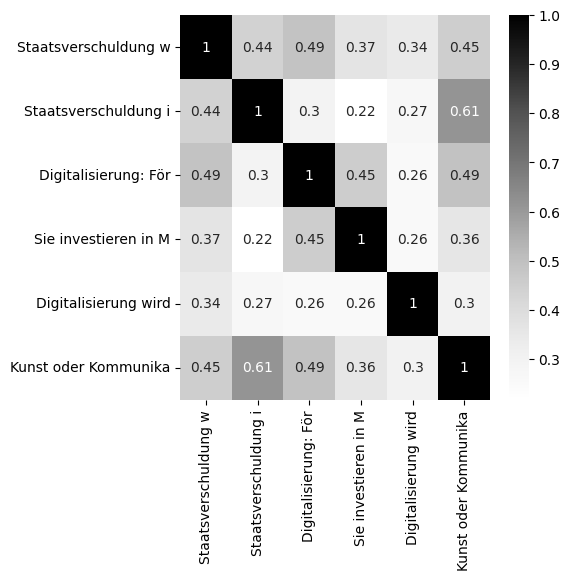

In [ ]:
similarity = []
for i in range(len(docs)):
      row = []
      for j in range(len(docs)):
          row.append(docs[i].similarity(docs[j]))
      similarity.append(row)
create_heatmap(similarity)

In [ ]:
print(docs[0].vector)

[-1.6263094   0.8128753   0.5882193  -1.1550767   0.38265026 -0.14346448
  0.7721037   1.6888185   0.12217903 -0.9576901   0.43094623 -1.9353756
 -0.22803408  0.38875747  0.43667287  2.3298433   1.647687   -0.67767394
  0.48131144  0.7011     -0.18966135  1.9242461   1.5720176   0.47899556
 -2.05658    -0.3505286   3.047844    0.17808735 -0.13114676  1.5857202
  0.31144348 -1.3416195  -0.06723973  1.7584144   0.6075226  -0.80408055
  0.3143861  -0.12350219  1.7645128   0.9535003  -0.89037824  1.5213642
 -0.5327059  -0.02294037 -0.20891857  0.00449944 -2.0553901  -2.256582
  0.5756788  -0.7836166  -1.7630463  -0.51726496  0.3280874   0.65370965
  0.09693158 -0.8953986  -0.4628126  -0.30985683 -2.0525064   0.41186208
 -0.45803177  1.0558348  -0.18730462  0.3584519  -0.980477   -0.18231812
 -0.6639588   1.0319424  -1.3820035   1.0733458  -1.2282436   0.5980976
  2.6068356   0.91087544 -0.24652112 -0.94324267  0.19870543 -1.5585586
  1.4571562  -0.92907476  0.67991954  0.17316172 -0.637104

<ipython-input-17-3260294749>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  row.append(docs[i].similarity(docs[j]))


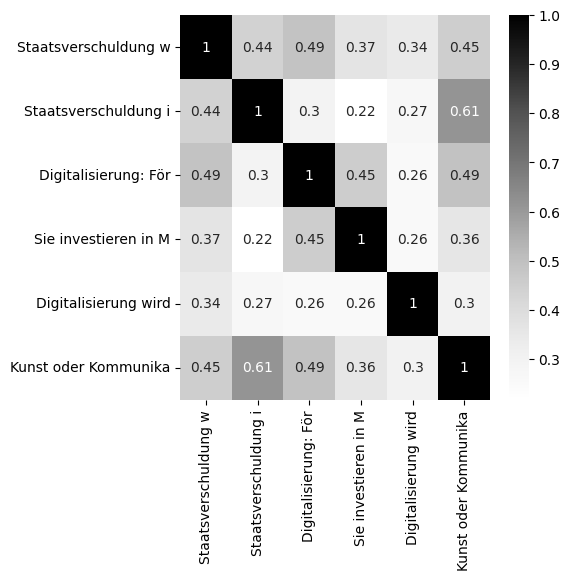

In [ ]:
similarity = []
for i in range(len(docs)):
    row = []
    for j in range(len(docs)):
      row.append(docs[i].similarity(docs[j]))
    similarity.append(row)
create_heatmap(similarity)

**6.1. Cosine Similarity Torch**

In [ ]:
import torch

def format_pytorch_version(version):
    return version.split('+')[0]

def format_cuda_version(version):
    return 'cu' + version.replace('.', '')

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)
CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

In [ ]:
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 31.5 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 37.6 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.0 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.4 MB/s eta 0:00:00


In [ ]:
pip install transformers

In [ ]:
pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch_geometric

torch_geometric.__version__

'2.6.1'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'dimgrey', 'grid.color':'lightgrey'})
import numpy as np
import pandas as pd
import networkx as nx
import torch.nn.functional as F
import torch.nn as nn
import torch_scatter
from sentence_transformers import SentenceTransformer, util
from torch_geometric.data import Data
from torch_geometric.utils import to_undirected

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentence1 = "Digitalisierung: Förderprogramme für Unternehmen 2025."
sentence2 = "Sie investieren in Medien und Digitalisierung."

# encode sentences to get their embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)
embedding2 = model.encode(sentence2, convert_to_tensor=True)

# cosinus similarity scores of two embeddings
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
print("Sentence 1:", sentence1)
print("Sentence 2:", sentence2)
print("Similarity score:", cosine_scores.item())

Sentence 1: Digitalisierung: Förderprogramme für Unternehmen 2025.
Sentence 2: Sie investieren in Medien und Digitalisierung.
Similarity score: 0.6517759561538696


In [ ]:
sentences1 = ["Sie investieren in Medien und Digitalisierung.", "Digitalisierung wird unvorstellbare Folgen haben.", "Digitalisierung: Förderprogramme für Unternehmen 2025."]
sentences2 = ["Staatsverschuldung ist mehr als nur eine Sonderzahlung.", "Staatsverschuldung wächst trotz Rekordeinnahmen."]

# encode list of sentences to get their embeddings
embedding1 = model.encode(sentences1, convert_to_tensor=True)
embedding2 = model.encode(sentences2, convert_to_tensor=True)

# compute similarity scores of two embeddings
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
for i in range(len(sentences1)):
    for j in range(len(sentences2)):
        print("Sentence 1:", sentences1[i])
        print("Sentence 2:", sentences2[j])
        print("Similarity Score:", cosine_scores[i][j].item())
        print()

Sentence 1: Sie investieren in Medien und Digitalisierung.
Sentence 2: Staatsverschuldung ist mehr als nur eine Sonderzahlung.
Similarity Score: 0.3019794225692749

Sentence 1: Sie investieren in Medien und Digitalisierung.
Sentence 2: Staatsverschuldung wächst trotz Rekordeinnahmen.
Similarity Score: 0.24351729452610016

Sentence 1: Digitalisierung wird unvorstellbare Folgen haben.
Sentence 2: Staatsverschuldung ist mehr als nur eine Sonderzahlung.
Similarity Score: 0.3597656488418579

Sentence 1: Digitalisierung wird unvorstellbare Folgen haben.
Sentence 2: Staatsverschuldung wächst trotz Rekordeinnahmen.
Similarity Score: 0.3367871344089508

Sentence 1: Digitalisierung: Förderprogramme für Unternehmen 2025.
Sentence 2: Staatsverschuldung ist mehr als nur eine Sonderzahlung.
Similarity Score: 0.29090359807014465

Sentence 1: Digitalisierung: Förderprogramme für Unternehmen 2025.
Sentence 2: Staatsverschuldung wächst trotz Rekordeinnahmen.
Similarity Score: 0.30302733182907104



**6.2. Cosine Similarity Vectorizer**


Cosine Similarity computes the similarity of two vectors as the cosine of the angle between two vectors. It determines whether two vectors are pointing in roughly the same direction. So if the angle between the vectors is 0 degrees, then the cosine similarity is 1.


The Cosine of an angle can take a value between -1 and 1. Speaking from the NLP perspective, this value could be between 0 and 1. If a word does not appear in one of the texts, the fraction becomes zero.

In [ ]:
text_1 = "Sie investieren in Medien und Digitalisierung"
text_2 = "Digitalisierung hat unvorstellbare Folgen"
text_3 = "Digitalisierung: Förderprogramme für Unternehmen 2025"

texts = [text_1, text_2, text_3]
print(texts)

['Sie investieren in Medien und Digitalisierung', 'Digitalisierung hat unvorstellbare Folgen', 'Digitalisierung: Förderprogramme für Unternehmen 2025']


In [ ]:
## Constract again the bag of words table
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(stop_words=["ein","das","der","die","den"])
count_vectorizer = CountVectorizer()
matrix = count_vectorizer.fit_transform(texts)

In [ ]:
## Creating a data frame to represent the number of the words in every sentence
table = matrix.todense()
df = pd.DataFrame(table,
                  columns=count_vectorizer.get_feature_names_out(),
                  index=['text_1', 'text_2', 'text_2'])

In [ ]:
 ## Aplying the Cosine similarity module, scale is 0 - 1, closer to 1 means more similar
from sklearn.metrics.pairwise import cosine_similarity
values = cosine_similarity(df, df)
df = pd.DataFrame(values, columns=["Text 1", "Text 2", "Text 3"], index = ["Text 1", "Text 2", "Text 3"])
print(df)

          Text 1    Text 2    Text 3
Text 1  1.000000  0.204124  0.182574
Text 2  0.204124  1.000000  0.223607
Text 3  0.182574  0.223607  1.000000


**7. ElMo Embeddings from Language Models**

There is repository of models: https://vectors.nlpl.eu/repository/
You can download Elmo model for german wikipedia language here: 201,German Wikipedia Dump of March 2020. The model has 200 MB and has a rich contextual information.

You can use model online from Kaggle pages:

In [ ]:
pip install simple_elmo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.4 MB/s eta 0:00:00


In [ ]:
!python -m spacy download de_core_news_sm
!python -m spacy download de_core_news_md
!python -m spacy download de_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 34.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 11.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load(

In [ ]:
nlp = spacy.load("de_core_news_sm")
docs = [nlp(headline) for headline in headlines]

In [ ]:
import tensorflow.compat.v1 as tf # compatible only for multilingual USE, large USE, EN-DE USE, ...
#import tensorflow as tf # version 2 is compatible only for USE 4, ..
import tensorflow_hub as hub
import spacy
import logging
from scipy import spatial
from simple_elmo import ElmoModel

In [ ]:
logging.getLogger('tensorflow').disabled = True #OPTIONAL - to disable outputs from Tensorflow

# elmo = hub.Module('path if downloaded/Elmo_dowmloaded', trainable=False)
elmo = hub.load("https://tfhub.dev/google/elmo/3") # 100% optimised only for english language

tensor_of_strings = tf.constant(["Grau","Schnell","Langsam"])
elmo.signatures['default'](tensor_of_strings)

{'lstm_outputs1': <tf.Tensor: shape=(3, 1, 1024), dtype=float32, numpy=
 array([[[-0.848304  ,  0.2815089 , -0.16889301, ...,  0.54750633,
          -1.3419414 ,  0.02468287]],
 
        [[-0.2520564 ,  0.33408612, -0.28418368, ...,  0.12691905,
          -0.68165565,  0.2729168 ]],
 
        [[-0.125907  ,  0.15004072, -0.1353187 , ..., -0.21138076,
          -0.45031556, -0.095571  ]]], dtype=float32)>,
 'lstm_outputs2': <tf.Tensor: shape=(3, 1, 1024), dtype=float32, numpy=
 array([[[-2.231532  , -1.2103474 ,  0.3227837 , ...,  0.96595144,
          -1.632412  , -0.257261  ]],
 
        [[-1.037068  , -0.49287254,  0.03966084, ...,  0.15224712,
          -0.4802464 ,  0.03898463]],
 
        [[-0.9605165 , -0.69723284,  0.17797491, ..., -0.38156402,
          -0.1505675 , -0.32325077]]], dtype=float32)>,
 'word_emb': <tf.Tensor: shape=(3, 1, 512), dtype=float32, numpy=
 array([[[ 0.43285847, -0.58723867, -0.10984479, ...,  0.48780605,
           0.14662682, -0.08479185]],
 
        [

In [ ]:
import zipfile

In [ ]:
model = ElmoModel()
de_model="201.zip" # locate the downloaded zip file into compiler
model.load(de_model)

sentence = "Wikipedia ist ein Projekt zum Aufbau einer Enzyklopädie aus freien Inhalten, zu denen du sehr gern beitragen kannst."

/usr/local/lib/python3.11/dist-packages/simple_elmo/model.py:531: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  lstm_cell = tf.compat.v1.nn.rnn_cell.LSTMCell(


In [ ]:
elmo_vectors = model.get_elmo_vectors(sentence, layers="average")
print(f"Tensor shape: {elmo_vectors.shape}")

Tensor shape: (116, 1, 1024)


In [ ]:
Projekt = np.sum(elmo_vectors[0][29:33], axis = 0)/4
Aufbau = np.sum(elmo_vectors[0][45:49], axis = 0)/4
Inhalten = np.sum(elmo_vectors[0][87:91], axis = 0)/4

In [ ]:
Projekt = Projekt.reshape(1,-1)
Aufbau = Aufbau.reshape(1,-1)
Inhalten = Inhalten.reshape(1,-1)

In [ ]:
diff_1 = cosine_similarity(Projekt, Aufbau)
diff_2 = cosine_similarity(Aufbau, Inhalten)
same = cosine_similarity(Projekt, Inhalten)

print('Vector similarity for  *similar*  meanings:  %.2f' % same)
print('Vector similarity for *different* meanings:  %.2f' % diff_1)
print('Vector similarity for *different* meanings:  %.2f' % diff_2)

Vector similarity for  *similar*  meanings:  0.00
Vector similarity for *different* meanings:  0.00
Vector similarity for *different* meanings:  0.00


<ipython-input-77-1489327702>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Vector similarity for  *similar*  meanings:  %.2f' % same)
<ipython-input-77-1489327702>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Vector similarity for *different* meanings:  %.2f' % diff_1)
<ipython-input-77-1489327702>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Vector similarity for *different* meanings:  %.2f' % diff_2)


**8. Roberta**

The all-roberta-large-v1 model is a sentence transformer developed by the sentence-transformers team. It maps sentences and paragraphs to a 1024-dimensional dense vector space, enabling tasks like clustering and semantic search. This model is based on the RoBERTa architecture and can be used through the sentence-transformers library or directly with the HuggingFace Transformers library.

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
sentences = [
#Finanzen
"Staatsverschuldung wächst trotz Rekordeinnahmen",
"Staatsverschuldung ist mehr als nur eine Sonderzahlung"]

In [ ]:
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')
embeddings = model.encode(sentences)
print(embeddings)

similarities = model.similarity(embeddings, embeddings)
print(similarities)
# With a high similarity score of 0.7860 this model is accurate and sentences are very similar.

[[ 0.02222362  0.06129374 -0.0492874  ... -0.04938071 -0.01347246
  -0.04540702]
 [ 0.06419689  0.06863014 -0.04384479 ... -0.02730488 -0.01961843
  -0.04966379]]
tensor([[1.0000, 0.7860],
        [0.7860, 1.0000]])


**9. Universal Sentence Encoder (USE by Google)**


The universal sentence encoder model encodes textual data into high dimensional vectors known as embeddings which are numerical representations of the textual data. It specifically targets transfer learning to other NLP tasks, such as text classification, semantic similarity, and clustering. The pre-trained Universal Sentence Encoder is publicly available in Tensorflow-hub.

It is trained on a variety of data sources to learn for a wide variety of tasks. The sources are Wikipedia, web news, web question-answer pages, and discussion forums.

**XLING** model is trained for english and german and is compatible with tensorflow version 1.



In [ ]:
pip install tf_sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00


In [ ]:
pip install sentencepiece

In [ ]:
pip install tensorflow==2.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0


In [ ]:
import tensorflow.compat.v1 as tf # compatible only for multilingual USE, large USE, EN-DE USE, ...
#import tensorflow as tf # version 2 is compatible only for USE 4, ..
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import sklearn
import sentencepiece

In [ ]:
#module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
#model_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual/1"
model_url = "https://tfhub.dev/google/universal-sentence-encoder-xling/en-de/1"
#model = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

df = pd.DataFrame(columns=["ID","DESCRIPTION"], data=np.matrix([[10,"Staatsverschuldung wächst trotz Rekordeinnahmen"],
                                                                [11,"Staatsverschuldung ist mehr als nur eine Sonderzahlung"],
                                                                [12,"Digitalisierung: Förderprogramme für Unternehmen 2025"],
                                                                [13,"Sie investieren in Medien und Digitalisierung"],
                                                                [14,"Digitalisierung wird unvorstellbare Folgen haben"],
                                                                [15,"Kunst oder Kommunikation: Wie trennbar ist das Werk vom Künstler"]
                                                                ]))

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
message_embeddings = embed(list(df['DESCRIPTION']))
cos_sim = sklearn.metrics.pairwise.cosine_similarity(message_embeddings)

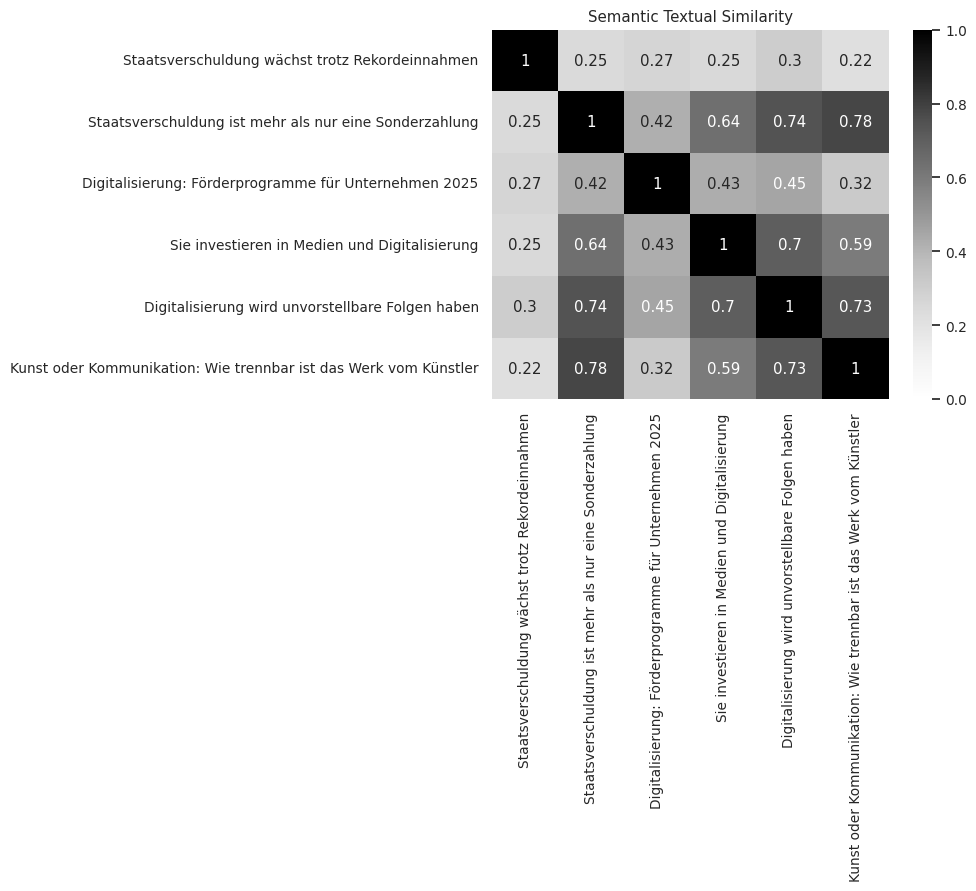

In [ ]:
def plot_similarity(labels, corr_matrix):
  sns.set(font_scale=0.9)
  g = sns.heatmap(
      corr_matrix,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="Greys",
      annot=True)
  g.set_xticklabels(labels, rotation=90)
  g.set_title("Semantic Textual Similarity")

plot_similarity(list(df['DESCRIPTION']), cos_sim)

**10. One Hot Encoding**

Used for text representation, but decision trees and dictionaries are more evolved.

In [106]:
import sklearn

In [111]:
import pandas as pd

# Example dataset
df = pd.DataFrame({
    'Farbe': ['rot', 'grün', 'blau']
})

# Apply One-Hot Encoding
encoded_df = pd.get_dummies(df['Farbe'])
print(encoded_df)

    blau   grün    rot
0  False  False   True
1  False   True  False
2   True  False  False


**11. Bag of Words**

Bag of Words is useful in many NLP tasks:
Feature extraction, Simplicity and efficiency, Document similarity, ...

We can use it to calculate the cosine similarity.

In [116]:
import spacy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [117]:
# A corpus containing a collection of sentences
corpus = [
"Staatsverschuldung wächst trotz Rekordeinnahmen",
"Staatsverschuldung ist mehr als nur eine Sonderzahlung"
]

In [118]:
# Initialize vectorizer
vectorizer = CountVectorizer()

In [119]:
# Fit vectorizer to corpus
bow = vectorizer.fit_transform(corpus)

In [120]:
# View vocabulary
vectorizer.vocabulary_

{'staatsverschuldung': 7,
 'wächst': 9,
 'trotz': 8,
 'rekordeinnahmen': 5,
 'ist': 2,
 'mehr': 3,
 'als': 0,
 'nur': 4,
 'eine': 1,
 'sonderzahlung': 6}

In [121]:
print(bow)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11 stored elements and shape (2, 10)>
  Coords	Values
  (0, 7)	1
  (0, 9)	1
  (0, 8)	1
  (0, 5)	1
  (1, 7)	1
  (1, 2)	1
  (1, 3)	1
  (1, 0)	1
  (1, 4)	1
  (1, 1)	1
  (1, 6)	1


In [122]:
# Dense matrix representation
bow.toarray()

array([[0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 0]])

In [124]:
# Load english language model
nlp = spacy.load('de_core_news_sm')

# Define custom tokenizer (remove stop words and punctuation and apply lemmatization)
def custom_tokenizer(doc):
    return [t.lemma_ for t in nlp(doc) if (not t.is_punct) and (not t.is_stop)]

In [125]:
# Pass tokenizer as callback function to countvectorizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, binary=True)

# Fit vectorizer to corpus
bow = vectorizer.fit_transform(corpus)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [126]:
# Vocabulary
vectorizer.vocabulary_

{'Staatsverschuldung': 2,
 'wachsen': 4,
 'trotz': 3,
 'Rekordeinnahm': 0,
 'Sonderzahlung': 1}

In [127]:
# Dense matrix representation
bow.toarray()

array([[1, 0, 1, 1, 1],
       [0, 1, 1, 0, 0]])

In [128]:
# Sparse slice
print(bow[:,0:4])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (2, 4)>
  Coords	Values
  (0, 2)	1
  (0, 3)	1
  (0, 0)	1
  (1, 2)	1
  (1, 1)	1


In [129]:
# Cosine similarity using numpy
def cosine_sim(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [132]:
# Similarity between two documents
print(corpus[0])
print(corpus[1])
print(f'Similarity score: {cosine_sim(bow[0].toarray().squeeze(),bow[1].toarray().squeeze()):.1f}')

Staatsverschuldung wächst trotz Rekordeinnahmen
Staatsverschuldung ist mehr als nur eine Sonderzahlung
Similarity score: 0.4


In [133]:
print(cosine_similarity(bow))

[[1.         0.35355339]
 [0.35355339 1.        ]]
